In [14]:
from algorithm import System
from structures import Node, Graph
from typing import Tuple, List
from copy import deepcopy
from dataclasses import dataclass
from util import draw_graph
import random

from baruah import baruah, relax_original, relax_ppd_nce, apply_domination_to_tables

In [2]:
@dataclass
class RandomGraphCreateInfo:
    max_delay: int
    min_nodes: int
    max_nodes: int
    min_edges: int
    max_edges: int | None = None


In [3]:
def random_graph(create_info: RandomGraphCreateInfo) -> Graph:
    graph = {}

    num_nodes = random.randint(create_info.min_nodes, create_info.max_nodes)
    nodes = [x for x in range(num_nodes)]
    for node in nodes:
        graph[node] = {}

    max_edges_from_num_nodes = num_nodes * (num_nodes - 1) // 2

    if create_info.max_edges != None:
        max_edges = min(create_info.max_edges, max_edges_from_num_nodes)
    else:
        max_edges = max_edges_from_num_nodes

    min_edges = min(create_info.min_edges, max_edges_from_num_nodes)
    num_edges = random.randint(min_edges, max_edges)

    possible_edges: List[Tuple[Node, Node]] = []
    for u in nodes:
        for v in nodes:
            if u != v:
                possible_edges.append((u, v))

    for _ in range(num_edges):
        edge = random.choice(possible_edges)
        (u, v) = edge

        possible_edges.remove(edge)
        graph[u][v] = random_weights(create_info.max_delay)

    return Graph(graph)

In [4]:
def random_weights(max_delay: int) -> Tuple[int, int]:
    typical_delay = random.randint(1, max_delay)
    return (typical_delay, random.randint(typical_delay, max_delay))

In [5]:
def test_algorithm(graph: Graph, destination: Node, edge: Tuple[Node, Node], new_expected_delay: int) -> bool:
    original_graph = deepcopy(graph)

    system = System(graph, destination)

    system.simulate_edge_change(edge, new_expected_delay)
    actual_tables = system.tables()
    
    system.recalculate_tables()
    expected_tables = system.tables()

    if actual_tables != expected_tables:
        print("FAIL")

        print("graph data")
        print(original_graph.data)
        print()

        print("original graph")
        print(f"{original_graph}")

        print("modified graph")
        print(f"{system.graph}")

        print(f"destination: {destination}")
        print(f"edge: {edge}")
        print(f"new expected_delay: {new_expected_delay}")

        print()

        print("BARUAH on original")
        print(baruah(original_graph, destination, relax_ppd_nce))

        print("BARUAH on modified")
        print(baruah(system.graph, destination, relax_ppd_nce))

        print()

        print("SYSTEM LOGS")

        for log in system.logs:
            print(log)

        for node in actual_tables.keys():
            actual = actual_tables[node]
            expected = expected_tables[node]

            if actual != expected:
                missing = actual.entries - expected.entries
                should_not_have_been_created = expected.entries - actual.entries

                print()
                print(f"WRONG TABLE AT NODE {node}")
                print("actual")
                print(actual)
                print("expected")
                print(expected)
                print("only in actual")
                print(missing)
                print("not in actual")
                print(should_not_have_been_created)

        print()
        return False
    return True

In [6]:
def test_algorithm_multiple_change(graph: Graph, destination: Node, changes) -> bool:
    original_graph = deepcopy(graph)

    system = System(graph, destination)

    for (edge, delay) in changes:
        system.modify_edge(edge, delay)
    
    for (edge, delay) in changes:
        system.simulate_edge_change(edge, delay)
    
    actual_tables = system.tables()
    
    system.recalculate_tables()
    expected_tables = system.tables()

    if actual_tables != expected_tables:
        print("FAIL")

        print("graph data")
        print(original_graph.data)
        print()

        print("original graph")
        print(f"{original_graph}")

        print("modified graph")
        print(f"{system.graph}")

        print(f"destination: {destination}")
        print(f"edge: {edge}")
        print(f"new expected_delay: {new_expected_delay}")

        print()

        print("BARUAH on original")
        print(baruah(original_graph, destination, relax_ppd_nce))

        print("BARUAH on modified")
        print(baruah(system.graph, destination, relax_ppd_nce))

        print()

        print("SYSTEM LOGS")

        for log in system.logs:
            print(log)

        for node in actual_tables.keys():
            actual = actual_tables[node]
            expected = expected_tables[node]

            if actual != expected:
                missing = actual.entries - expected.entries
                should_not_have_been_created = expected.entries - actual.entries

                print()
                print(f"WRONG TABLE AT NODE {node}")
                print("actual")
                print(actual)
                print("expected")
                print(expected)
                print("only in actual")
                print(missing)
                print("not in actual")
                print(should_not_have_been_created)

        print()
        return False
    return True

In [7]:
def test_algorithm(graph: Graph, destination: Node, edge: Tuple[Node, Node], new_expected_delay: int) -> bool:
    original_graph = deepcopy(graph)

    system = System(graph, destination)

    system.simulate_edge_change(edge, new_expected_delay)
    actual_tables = system.tables()
    
    system.recalculate_tables()
    expected_tables = system.tables()

    if actual_tables != expected_tables:
        print("FAIL")

        print("graph data")
        print(original_graph.data)
        print()

        print("original graph")
        print(f"{original_graph}")

        print("modified graph")
        print(f"{system.graph}")

        print(f"destination: {destination}")
        print(f"edge: {edge}")
        print(f"new expected_delay: {new_expected_delay}")

        print()

        print("BARUAH on original")
        print(baruah(original_graph, destination, relax_ppd_nce))

        print("BARUAH on modified")
        print(baruah(system.graph, destination, relax_ppd_nce))

        print()

        print("SYSTEM LOGS")

        for log in system.logs:
            print(log)

        for node in actual_tables.keys():
            actual = actual_tables[node]
            expected = expected_tables[node]

            if actual != expected:
                missing = actual.entries - expected.entries
                should_not_have_been_created = expected.entries - actual.entries

                print()
                print(f"WRONG TABLE AT NODE {node}")
                print("actual")
                print(actual)
                print("expected")
                print(expected)
                print("only in actual")
                print(missing)
                print("not in actual")
                print(should_not_have_been_created)

        print()
        return False
    return True

# If multiple edges change expected delay at the same time

In [8]:
def random_test(
    random_graph_create_info: RandomGraphCreateInfo,
    num_tests: int = 10_000_000,
):
    passed = 0

    for i in range(1, num_tests + 1):
        if i % 10000 == 0:
            print(f"AT TEST {i}")
            print()

        graph = random_graph(random_graph_create_info)
        
        edge_to_change_1 = random.choice(list(graph.edges()))
        new_delay_1 = random.randint(0, edge_to_change_1.worst_case_delay)

        edge_to_change_2 = random.choice(list(graph.edges()))
        new_delay_2 = random.randint(0, edge_to_change_2.worst_case_delay)


        changes = []
        for x in range(random.randint(0, len(list(graph.edges())))):
            edge = random.choice(list(graph.edges()))
            changes.append(((edge.from_node, edge.to_node), random.randint(0, edge.worst_case_delay)))

        if test_algorithm_multiple_change(graph, 0, [((edge_to_change_1.from_node, edge_to_change_1.to_node), new_delay_1), ((edge_to_change_2.from_node, edge_to_change_2.to_node), new_delay_2)]):
            passed += 1

    print(f"{passed} passed out of {num_tests}")

In [9]:
random_test(RandomGraphCreateInfo(
    max_delay=100,
    min_nodes=4,
    max_nodes=6,
    min_edges=3,
))

KeyboardInterrupt: 

# If worse case delay changes

In [26]:
def test_algorithm_worst(graph: Graph, destination: Node, edge: Tuple[Node, Node], new_worst_delay: int) -> bool:
    original_graph = deepcopy(graph)

    system = System(graph, destination)

    system.run_modify_worse_case_delay(edge, new_worst_delay)
    actual_tables = system.tables()
    
    system.recalculate_tables()
    expected_tables = system.tables()

    if actual_tables != expected_tables:
        print("FAIL")

        print("graph data")
        print(original_graph.data)
        print()

        print("original graph")
        print(f"{original_graph}")

        print("modified graph")
        print(f"{system.graph}")

        print(f"destination: {destination}")
        print(f"edge: {edge}")
        print(f"new expected_delay: {new_worst_delay}")

        print()

        print("BARUAH on original")
        print(baruah(original_graph, destination, relax_ppd_nce))

        print("BARUAH on modified")
        print(baruah(system.graph, destination, relax_ppd_nce))

        print()

        print("SYSTEM LOGS")

        for log in system.logs:
            print(log)

        for node in actual_tables.keys():
            actual = actual_tables[node]
            expected = expected_tables[node]

            if actual != expected:
                missing = actual.entries - expected.entries
                should_not_have_been_created = expected.entries - actual.entries

                print()
                print(f"WRONG TABLE AT NODE {node}")
                print("actual")
                print(actual)
                print("expected")
                print(expected)
                print("only in actual")
                print(missing)
                print("not in actual")
                print(should_not_have_been_created)

        print()
        return False
    return True

In [27]:
def random_test_worst_case_delay(
    random_graph_create_info: RandomGraphCreateInfo,
    num_tests: int = 10000000,
):
    passed = 0

    for i in range(1, num_tests + 1):
        if i % 10000 == 0:
            print(f"AT TEST {i}")
            print()

        graph = random_graph(random_graph_create_info)
        
        edge_to_change = random.choice(list(graph.edges()))
        new_delay = random.randint(edge_to_change.expected_delay, edge_to_change.worst_case_delay*10)

        if test_algorithm_worst(graph, 0, (edge_to_change.from_node, edge_to_change.to_node), new_delay):
            passed += 1
        else:
            break;

    print(f"{passed} passed out of {num_tests}")

In [57]:
random_test_worst_case_delay(RandomGraphCreateInfo(
    max_delay=25,
    min_nodes=5,
    max_nodes=5,
    min_edges=3,
))

FAIL
graph data
{0: {}, 1: {4: (9, 14), 0: (10, 13)}, 2: {0: (23, 23), 1: (25, 25)}, 3: {1: (7, 16), 2: (8, 11)}, 4: {3: (13, 22), 1: (18, 21)}}

original graph
0:
    None
1:
    -(9, 14)-> 4
    -(10, 13)-> 0
2:
    -(23, 23)-> 0
    -(25, 25)-> 1
3:
    -(7, 16)-> 1
    -(8, 11)-> 2
4:
    -(13, 22)-> 3
    -(18, 21)-> 1

modified graph
0:
    None
1:
    -(9, 14)-> 4
    -(10, 109)-> 0
2:
    -(23, 23)-> 0
    -(25, 25)-> 1
3:
    -(7, 16)-> 1
    -(8, 11)-> 2
4:
    -(13, 22)-> 3
    -(18, 21)-> 1

destination: 0
edge: (1, 0)
new expected_delay: 109

BARUAH on original
{0: {Entry: 0 [] 0}, 1: {Entry: 13 [0] 10}, 2: {Entry: 23 [0] 23, Entry: 38 [1, 0] 35}, 3: {Entry: 34 [2, 0] 31, Entry: 29 [1, 0] 17}, 4: {Entry: 51 [3, 1, 0] 30, Entry: 34 [1, 0] 28}}
BARUAH on modified
{0: {Entry: 0 [] 0}, 1: {Entry: 70 [4, 3, 2, 0] 53, Entry: 109 [0] 10}, 2: {Entry: 23 [0] 23, Entry: 134 [1, 0] 35}, 3: {Entry: 34 [2, 0] 31, Entry: 116 [1, 0] 17}, 4: {Entry: 56 [3, 2, 0] 44, Entry: 129 [3, 1, 0] 3

KeyboardInterrupt: 

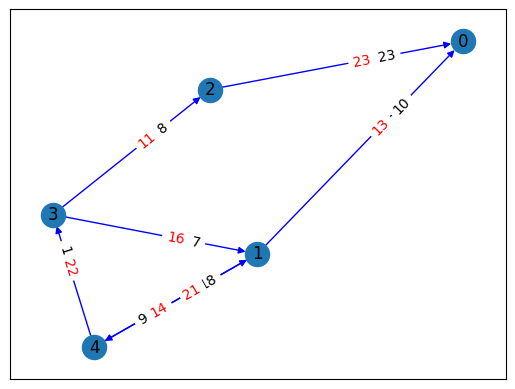

In [77]:
G = Graph({
    0: {}, 
    1: {4: (9, 14), 0: (10, 13)}, 
    2: {0: (23, 23)}, 
    3: {1: (7, 16), 2: (8, 11)}, 
    4: {3: (13, 22), 1: (18, 21)}
})
draw_graph(G)

In [91]:
G = Graph({
    0: {}, 
    1: {4: (9, 14), 0: (10, 13)}, 
    2: {0: (23, 23)}, 
    3: {1: (7, 16), 2: (8, 11)}, 
    4: {3: (13, 22), 1: (18, 21)}
})
test_algorithm_worst(G, 0, (1, 0), 71)

FAIL
graph data
{0: {}, 1: {4: (9, 14), 0: (10, 13)}, 2: {0: (23, 23)}, 3: {1: (7, 16), 2: (8, 11)}, 4: {3: (13, 22), 1: (18, 21)}}

original graph
0:
    None
1:
    -(9, 14)-> 4
    -(10, 13)-> 0
2:
    -(23, 23)-> 0
3:
    -(7, 16)-> 1
    -(8, 11)-> 2
4:
    -(13, 22)-> 3
    -(18, 21)-> 1

modified graph
0:
    None
1:
    -(9, 14)-> 4
    -(10, 71)-> 0
2:
    -(23, 23)-> 0
3:
    -(7, 16)-> 1
    -(8, 11)-> 2
4:
    -(13, 22)-> 3
    -(18, 21)-> 1

destination: 0
edge: (1, 0)
new expected_delay: 71

BARUAH on original
{0: {Entry: 0 [] 0}, 1: {Entry: 13 [0] 10}, 2: {Entry: 23 [0] 23}, 3: {Entry: 34 [2, 0] 31, Entry: 29 [1, 0] 17}, 4: {Entry: 51 [3, 1, 0] 30, Entry: 34 [1, 0] 28}}
BARUAH on modified
{0: {Entry: 0 [] 0}, 1: {Entry: 71 [0] 10, Entry: 70 [4, 3, 2, 0] 53}, 2: {Entry: 23 [0] 23}, 3: {Entry: 34 [2, 0] 31, Entry: 86 [1, 0] 17}, 4: {Entry: 91 [1, 0] 28, Entry: 99 [3, 1, 0] 30, Entry: 56 [3, 2, 0] 44}}

SYSTEM LOGS
[SYSTEM] message from 0 to 1 with content (removed: {Entry:

False

In [90]:

for x in range(9, 140):
    G = Graph({
        0: {}, 
        1: {4: (9, 14), 0: (10, 13)}, 
        2: {0: (23, 23)}, 
        3: {1: (7, 16), 2: (8, 11)}, 
        4: {3: (13, 22), 1: (18, 21)}
    })
    if not (test_algorithm_worst(G, 0, (1, 0), x)):
        print(x)

FAIL
graph data
{0: {}, 1: {4: (9, 14), 0: (10, 13)}, 2: {0: (23, 23)}, 3: {1: (7, 16), 2: (8, 11)}, 4: {3: (13, 22), 1: (18, 21)}}

original graph
0:
    None
1:
    -(9, 14)-> 4
    -(10, 13)-> 0
2:
    -(23, 23)-> 0
3:
    -(7, 16)-> 1
    -(8, 11)-> 2
4:
    -(13, 22)-> 3
    -(18, 21)-> 1

modified graph
0:
    None
1:
    -(9, 14)-> 4
    -(10, 71)-> 0
2:
    -(23, 23)-> 0
3:
    -(7, 16)-> 1
    -(8, 11)-> 2
4:
    -(13, 22)-> 3
    -(18, 21)-> 1

destination: 0
edge: (1, 0)
new expected_delay: 71

BARUAH on original
{0: {Entry: 0 [] 0}, 1: {Entry: 13 [0] 10}, 2: {Entry: 23 [0] 23}, 3: {Entry: 34 [2, 0] 31, Entry: 29 [1, 0] 17}, 4: {Entry: 51 [3, 1, 0] 30, Entry: 34 [1, 0] 28}}
BARUAH on modified
{0: {Entry: 0 [] 0}, 1: {Entry: 71 [0] 10, Entry: 70 [4, 3, 2, 0] 53}, 2: {Entry: 23 [0] 23}, 3: {Entry: 34 [2, 0] 31, Entry: 86 [1, 0] 17}, 4: {Entry: 91 [1, 0] 28, Entry: 99 [3, 1, 0] 30, Entry: 56 [3, 2, 0] 44}}

SYSTEM LOGS
[SYSTEM] message from 0 to 1 with content (removed: {Entry:

# If a new edge is added

# If an edge is removed